In [2]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


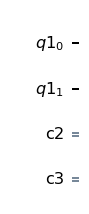

In [4]:
bl = QuantumRegister(2)
clx = ClassicalRegister(1)
clz = ClassicalRegister(1)
circ = QuantumCircuit(bl, clx, clz)

circ.draw(output='mpl')

In [7]:
def bel(circ):
    circ.h(bl[0])
    circ.cnot(bl[0], bl[1])
    
def meas(circ):
    circ.measure(0, 0)
    circ.measure(0, 1)

def transform(circ):
    circ.x(1).c_if(clx, 1)
    circ.z(1).c_if(clz, 1)

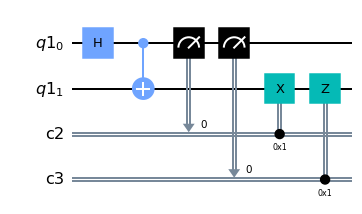

In [9]:
bel(circ)
meas(circ)
transform(circ)
circ.draw(output='mpl')

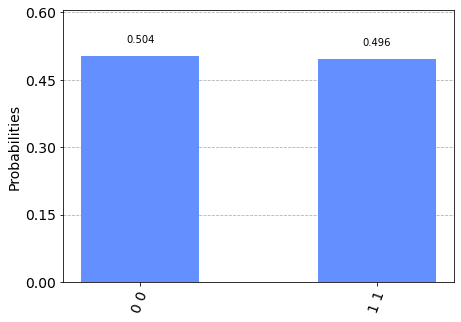

In [11]:
backend = Aer.get_backend('qasm_simulator')
counts = execute(circ, backend, shots=1024).result().get_counts()
plot_histogram(counts)